In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib inline

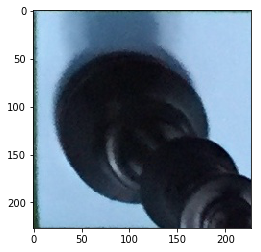

In [2]:
image = cv2.imread('H:\\AR-ExtendingOnlineGames\\data\\chess_pieces_data\\Chess ID Public Data\\train\\bk\\0646_63.jpg') 
plt.imshow(image)

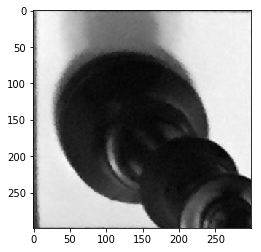

In [3]:
height, width = image.shape[:2]
resized_image = cv2.resize(image, (299, 299), interpolation = cv2.INTER_AREA)
# plt.imshow(resized_image)
gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

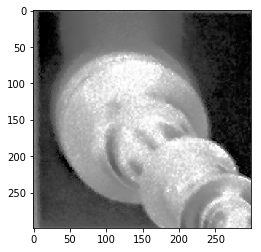

In [4]:
# https://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html
equalized_gray = cv2.equalizeHist(gray)
plt.imshow(equalized_gray, cmap='gray_r')

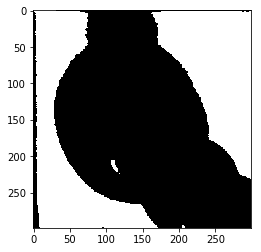

In [5]:
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')

In [6]:
hist = cv2.calcHist([gray],[0],None,[256],[0,256])
hist

array([[0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [2.000e+00],
       [3.000e+00],
       [2.000e+00],
       [1.000e+01],
       [2.300e+01],
       [1.050e+02],
       [3.380e+02],
       [7.870e+02],
       [1.345e+03],
       [1.906e+03],
       [2.314e+03],
       [2.685e+03],
       [2.539e+03],
       [2.382e+03],
       [1.917e+03],
       [1.582e+03],
       [1.345e+03],
       [1.171e+03],
       [1.194e+03],
       [1.208e+03],
       [1.201e+03],
       [1.042e+03],
       [9.160e+02],
       [8.740e+02],
       [9.730e+02],
       [9.890e+02],
       [1.025e+03],
       [9.290e+02],
       [8.650e+02],
       [7.120e+02],
       [6.860e+02],
       [6.210e+02],
       [5.440e+02],
       [4.660e+02],
       [4.140e+02],
       [4.190e+02],
       [3.970e+02],
       [3.670e+02],
       [3.700e+02],
       [3.330e+02],
       [3.540e+02],
       [3.420e+02],
       [3.160e+02],
       [3.630e+02],
       [3.400e+02],


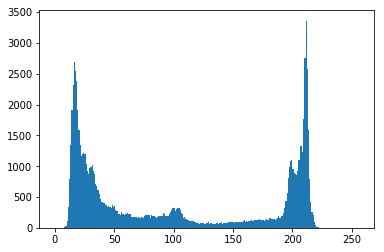

In [7]:
plt.hist(gray.ravel(),256,[0,256]); plt.show()

In [8]:
hist.shape

(256, 1)

In [9]:
image_hist = np.squeeze(hist)
image_hist.shape

(256,)

In [10]:
def get_image_intensity_histogram(img):
    resized_image = cv2.resize(image, (200, 200), interpolation = cv2.INTER_AREA)
    gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([gray],[0],None,[256],[0,256])
    return np.squeeze(hist)
    

In [15]:
def get_features_labels(data_path):
    X, y = [], []
    for fol in os.listdir(data_path):
        if ((fol[0] == "b") or (fol[0] == "w")):
            fol_path = os.path.join(data_path, fol)
            for file in os.listdir(fol_path):
                if ".jpg" in file:

                    if fol[0] == "b":
                        y.append(0)
                    else:
                        y.append(1)

                    complete_file_loc = os.path.join(fol_path, file)

                    X.append(get_image_intensity_histogram(complete_file_loc))

    return np.array(X), np.array(y)

In [16]:
X_train, y_train = get_features_labels("H:\\AR-ExtendingOnlineGames\\data\\chess_pieces_data\\Chess ID Public Data\\train")
X_test, y_test = get_features_labels("H:\\AR-ExtendingOnlineGames\\data\\chess_pieces_data\\Chess ID Public Data\\test")
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6899, 256)
(6899,)
(185, 256)
(185,)


(array([3424.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3475.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

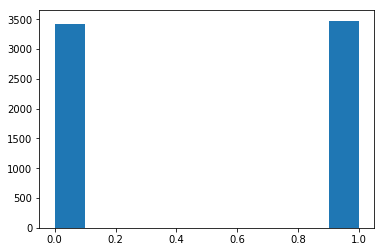

In [22]:
plt.hist(y_train)

(array([90.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 95.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

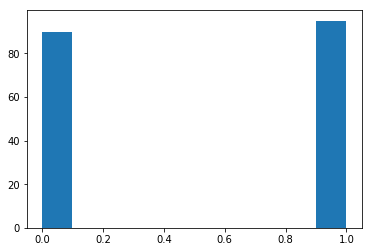

In [23]:
plt.hist(y_test)

In [18]:
import xgboost as xgb

gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(X_train, y_train)
predictions = gbm.predict(X_test)
print(predictions.shape)


(185,)


G:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [21]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])